In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
#ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Welcome to JupyROOT 6.28/00


Check what are the best variables to predict

In [31]:
date = "NOV05"

chainSGN = ROOT.TChain("events")
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1038_GFcat_OmegaCat_2018.root".format(date))
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018.root".format(date))
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1040_GFcat_D0StarRhoCat_2018.root".format(date))
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)
df = (df.Define("HCandMass_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta_GEN, goodMeson_phi_GEN, goodMeson_mass_GEN, goodPhotons_pt_GEN, goodPhotons_eta_GEN, goodPhotons_phi_GEN, 0)")
        .Define("HCandMass_goodMeson_pt_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_eta_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta_GEN, goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_phi_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta[0], goodMeson_phi_GEN, goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodMeson_mass_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass_GEN, goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodPhotons_pt_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt_GEN, goodPhotons_eta[0], goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodPhotons_eta_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta_GEN, goodPhotons_phi[0], 0)")
        .Define("HCandMass_goodPhotons_phi_GEN", "compute_HiggsVars_var(goodMeson_pt[0], goodMeson_eta[0], goodMeson_phi[0], goodMeson_mass[0], goodPhotons_pt[0], goodPhotons_eta[0], goodPhotons_phi_GEN, 0)")
        .Define("mesonMass_GEN", "sum2Body(goodMeson_ditrk_pt_GEN, goodMeson_ditrk_eta_GEN, goodMeson_ditrk_phi_GEN, goodMeson_ditrk_mass_GEN, goodMeson_photon1_pt_GEN, goodMeson_photon1_eta_GEN, goodMeson_photon1_phi_GEN, 0.1349766).M()")
        .Define("mesonMass_ditrk_pt_GEN", "sum2Body(goodMeson_ditrk_pt_GEN, goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()")
        .Define("mesonMass_ditrk_eta_GEN", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta_GEN, goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()")
        .Define("mesonMass_ditrk_phi_GEN", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi_GEN, goodMeson_ditrk_mass[0], goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()")
        .Define("mesonMass_ditrk_mass_GEN", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass_GEN, goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()")
        .Define("mesonMass_pi0_pt_GEN", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], goodMeson_photon1_pt_GEN, goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()")
        .Define("mesonMass_pi0_eta_GEN", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], goodMeson_photon1_pt[0], goodMeson_photon1_eta_GEN, goodMeson_photon1_phi[0], 0.1349766).M()")
        .Define("mesonMass_pi0_phi_GEN", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi_GEN, 0.1349766).M()")
        .Define("mesonMass_RECOTEST", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()"))

REPLACING ONE VARIABLE WITH THE GEN LEVEL EQUIVALENT
MOST IMPORTANT TO PREDICT TO IMPROVE: GOODMESON PT!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


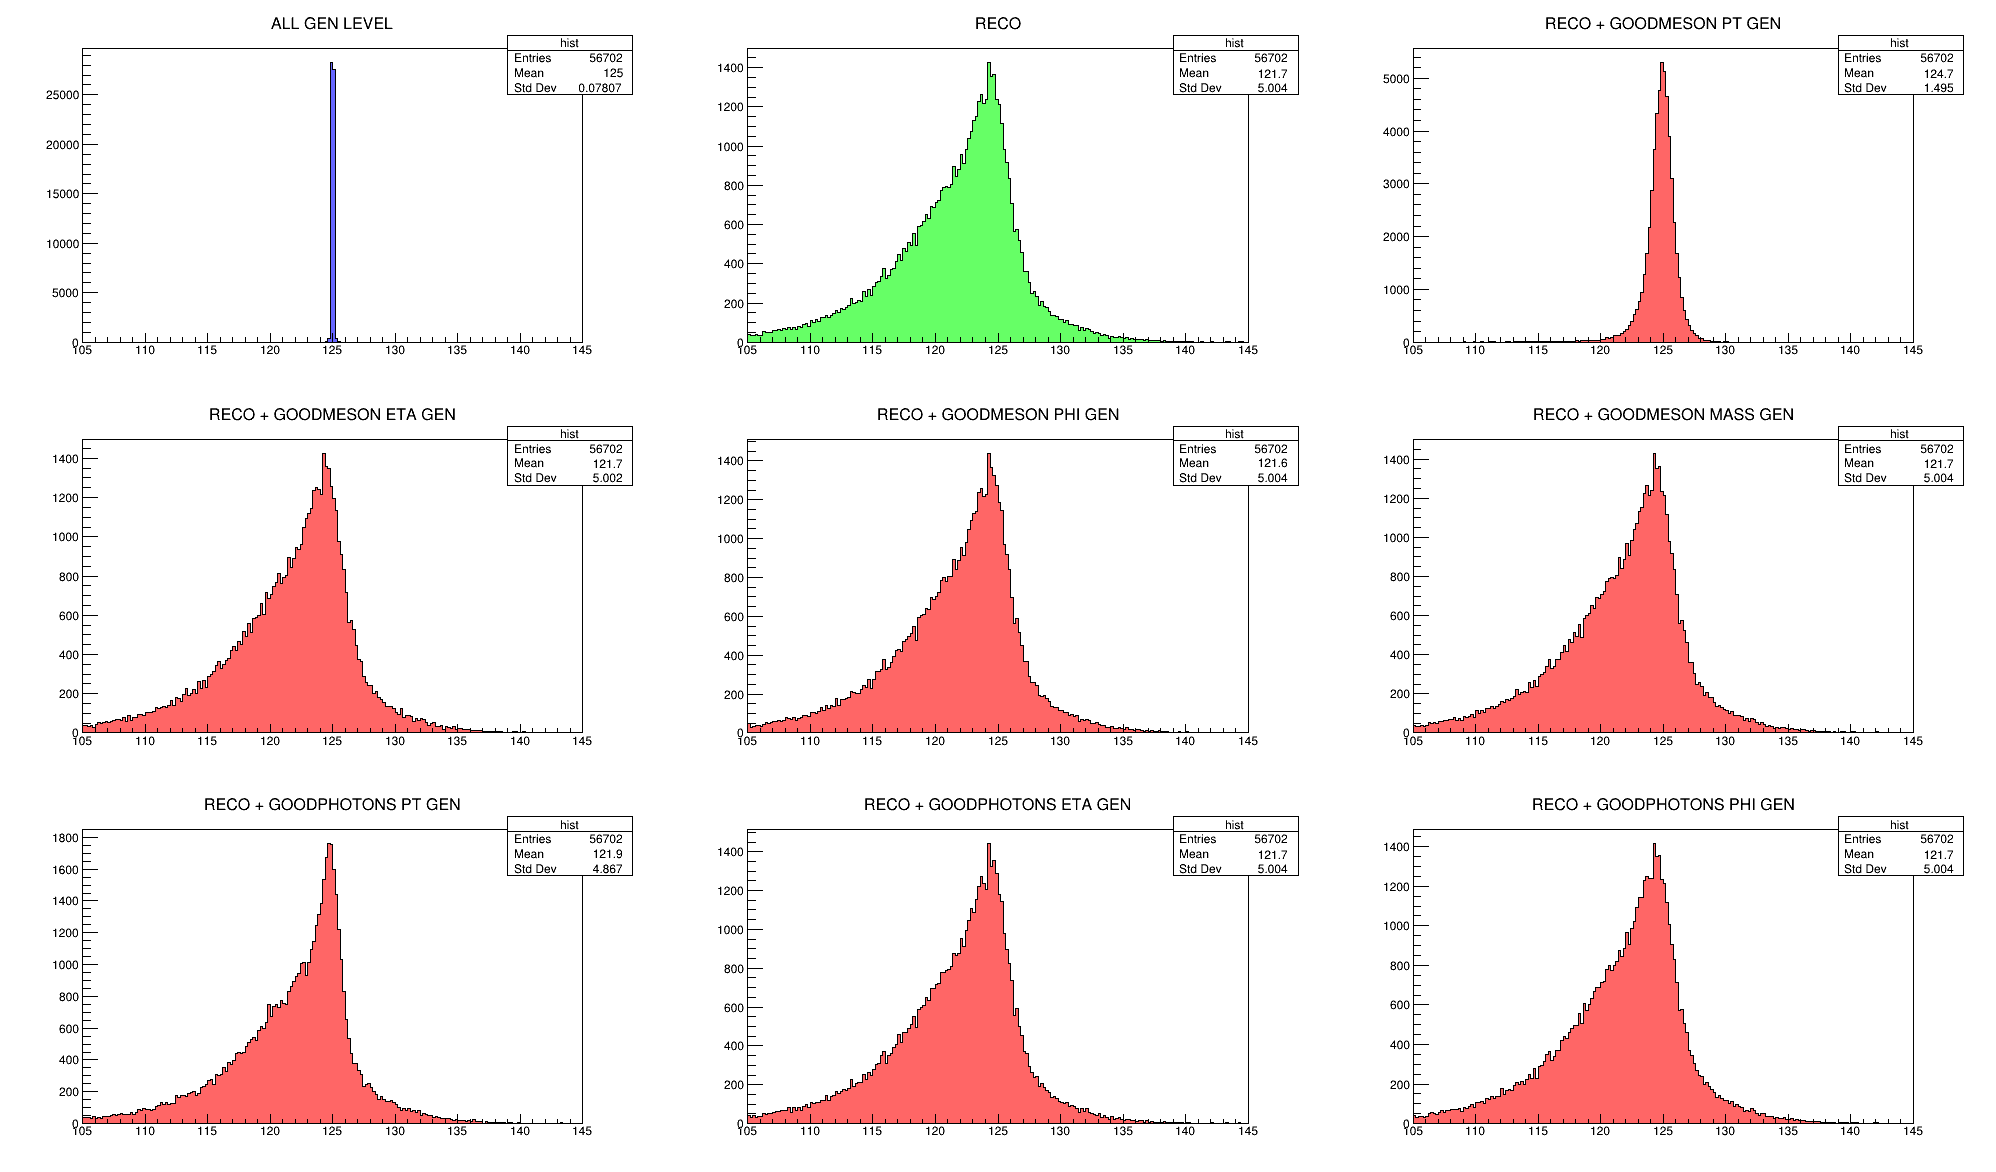

In [32]:
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 1200)
canvas.Divide(3, 3)

nbins, xlow, xhigh = 200, 105, 145

h1 = df.Histo1D(("hist", "ALL GEN LEVEL", nbins, xlow, xhigh), "HCandMass_GEN")
h2 = df.Histo1D(("hist", "RECO", nbins, xlow, xhigh), "HCandMass")
h3 = df.Histo1D(("hist", "RECO + GOODMESON PT GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_pt_GEN")
h4 = df.Histo1D(("hist", "RECO + GOODMESON ETA GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_eta_GEN")
h5 = df.Histo1D(("hist", "RECO + GOODMESON PHI GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_phi_GEN")
h6 = df.Histo1D(("hist", "RECO + GOODMESON MASS GEN", nbins, xlow, xhigh), "HCandMass_goodMeson_mass_GEN")
h7 = df.Histo1D(("hist", "RECO + GOODPHOTONS PT GEN", nbins, xlow, xhigh), "HCandMass_goodPhotons_pt_GEN")
h8 = df.Histo1D(("hist", "RECO + GOODPHOTONS ETA GEN", nbins, xlow, xhigh), "HCandMass_goodPhotons_eta_GEN")
h9 = df.Histo1D(("hist", "RECO + GOODPHOTONS PHI GEN", nbins, xlow, xhigh), "HCandMass_goodPhotons_phi_GEN")

h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kGreen-7)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kRed-7)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kRed-7)
h4.SetLineColor(ROOT.kBlack)
h5.SetFillColor(ROOT.kRed-7)
h5.SetLineColor(ROOT.kBlack)
h6.SetFillColor(ROOT.kRed-7)
h6.SetLineColor(ROOT.kBlack)
h7.SetFillColor(ROOT.kRed-7)
h7.SetLineColor(ROOT.kBlack)
h8.SetFillColor(ROOT.kRed-7)
h8.SetLineColor(ROOT.kBlack)
h9.SetFillColor(ROOT.kRed-7)
h9.SetLineColor(ROOT.kBlack)

p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
h4.Draw("hist")
p = canvas.cd(5)
h5.Draw("hist")
p = canvas.cd(6)
h6.Draw("hist")
p = canvas.cd(7)
h7.Draw("hist")
p = canvas.cd(8)
h8.Draw("hist")
p = canvas.cd(9)
h9.Draw("hist")

canvas.Draw()

print("REPLACING ONE VARIABLE WITH THE GEN LEVEL EQUIVALENT")
print("MOST IMPORTANT TO PREDICT TO IMPROVE: GOODMESON PT!")

REPLACING ONE VARIABLE WITH THE GEN LEVEL EQUIVALENT
MOST IMPORTANT TO PREDICT TO IMPROVE: GOODMESON PT!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


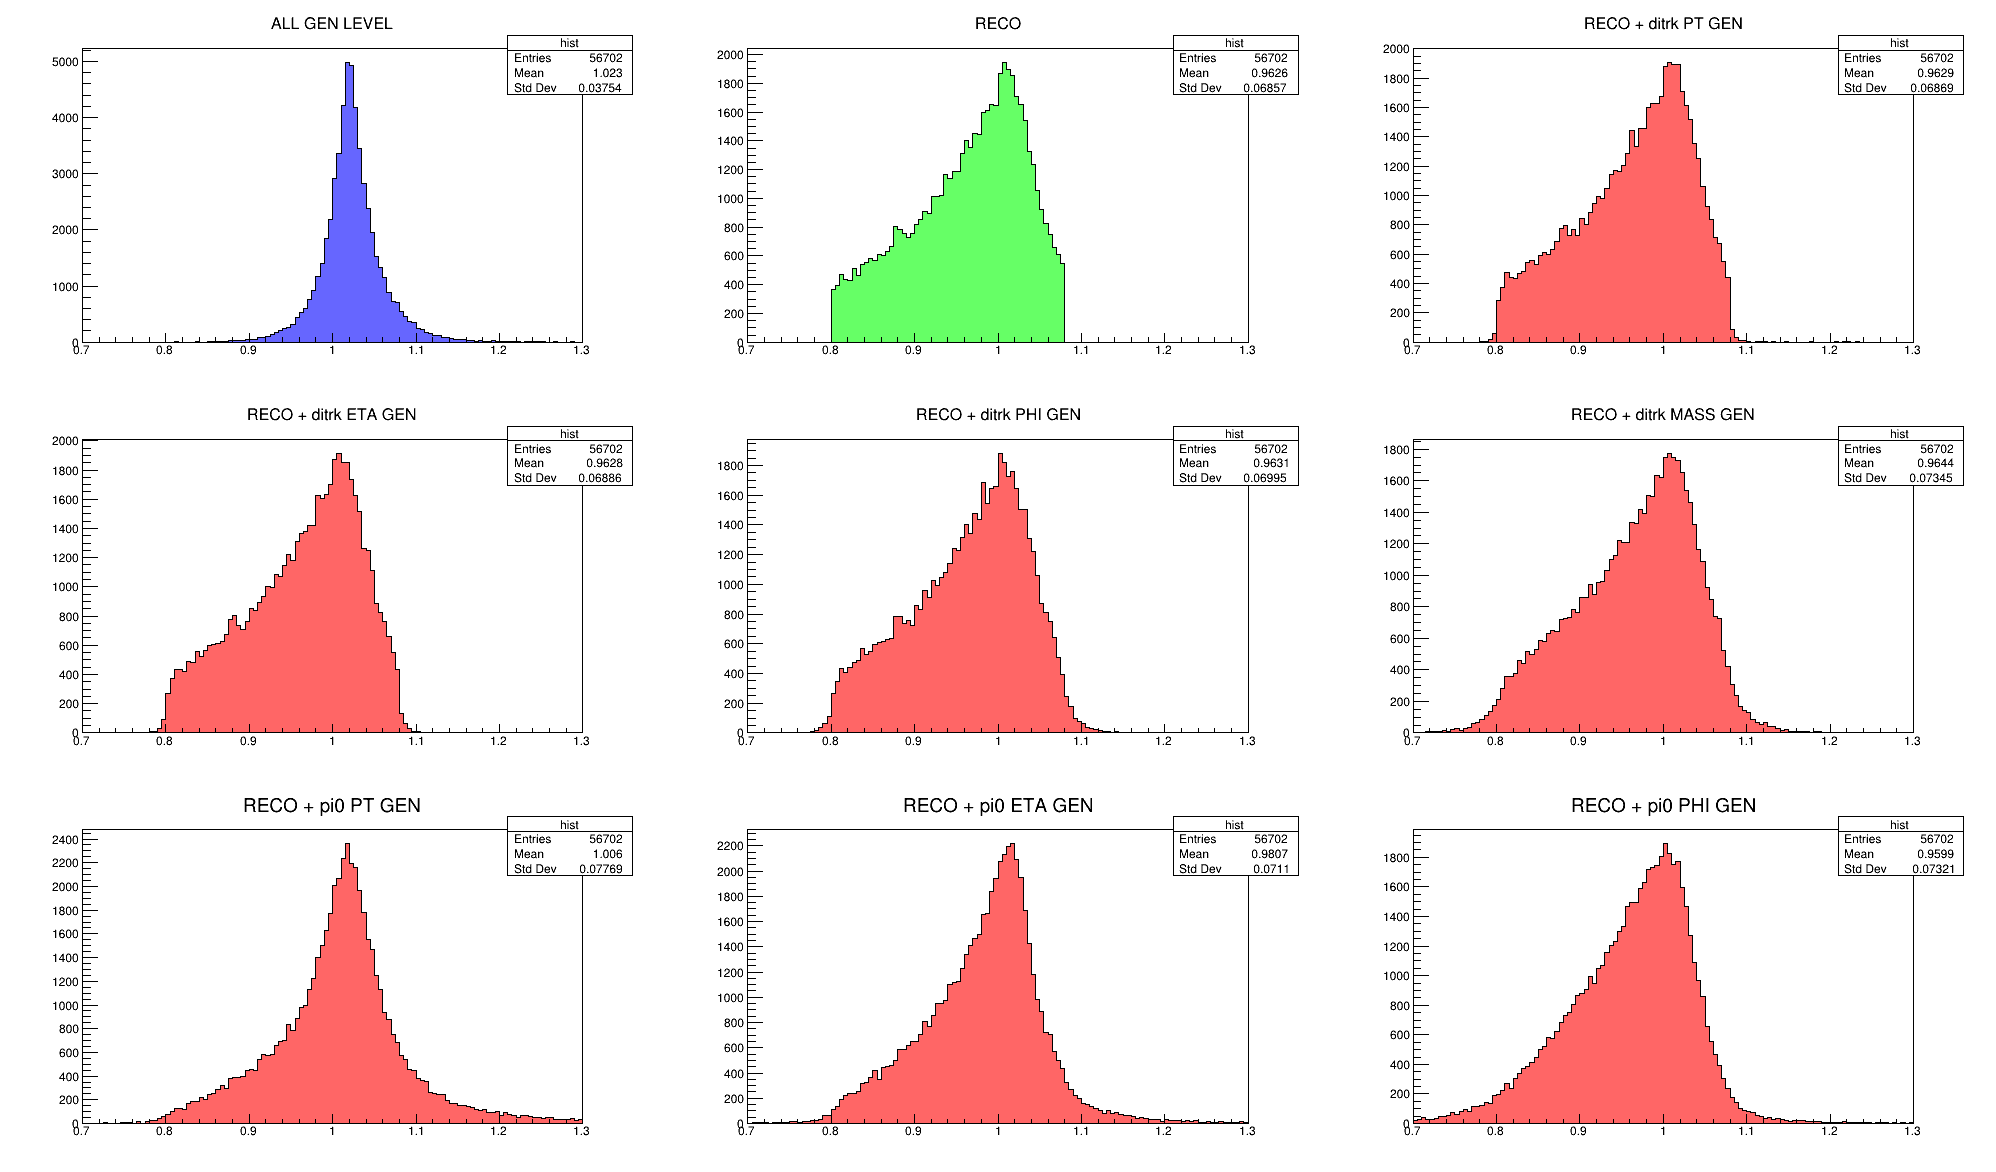

In [33]:
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 1200)
canvas.Divide(3, 3)

nbins, xlow, xhigh = 120, 0.7, 1.3

h1 = df.Histo1D(("hist", "ALL GEN LEVEL", nbins, xlow, xhigh), "mesonMass_GEN")
h2 = df.Histo1D(("hist", "RECO", nbins, xlow, xhigh), "goodMeson_mass")
h3 = df.Histo1D(("hist", "RECO + ditrk PT GEN", nbins, xlow, xhigh), "mesonMass_ditrk_pt_GEN")
h4 = df.Histo1D(("hist", "RECO + ditrk ETA GEN", nbins, xlow, xhigh), "mesonMass_ditrk_eta_GEN")
h5 = df.Histo1D(("hist", "RECO + ditrk PHI GEN", nbins, xlow, xhigh), "mesonMass_ditrk_phi_GEN")
h6 = df.Histo1D(("hist", "RECO + ditrk MASS GEN", nbins, xlow, xhigh), "mesonMass_ditrk_mass_GEN")
h7 = df.Histo1D(("hist", "RECO + pi0 PT GEN", nbins, xlow, xhigh), "mesonMass_pi0_pt_GEN")
h8 = df.Histo1D(("hist", "RECO + pi0 ETA GEN", nbins, xlow, xhigh), "mesonMass_pi0_eta_GEN")
h9 = df.Histo1D(("hist", "RECO + pi0 PHI GEN", nbins, xlow, xhigh), "mesonMass_pi0_phi_GEN")

h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kGreen-7)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kRed-7)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kRed-7)
h4.SetLineColor(ROOT.kBlack)
h5.SetFillColor(ROOT.kRed-7)
h5.SetLineColor(ROOT.kBlack)
h6.SetFillColor(ROOT.kRed-7)
h6.SetLineColor(ROOT.kBlack)
h7.SetFillColor(ROOT.kRed-7)
h7.SetLineColor(ROOT.kBlack)
h8.SetFillColor(ROOT.kRed-7)
h8.SetLineColor(ROOT.kBlack)
h9.SetFillColor(ROOT.kRed-7)
h9.SetLineColor(ROOT.kBlack)

p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
h4.Draw("hist")
p = canvas.cd(5)
h5.Draw("hist")
p = canvas.cd(6)
h6.Draw("hist")
p = canvas.cd(7)
h7.Draw("hist")
p = canvas.cd(8)
h8.Draw("hist")
p = canvas.cd(9)
h9.Draw("hist")

canvas.Draw()

print("REPLACING ONE VARIABLE WITH THE GEN LEVEL EQUIVALENT")
print("MOST IMPORTANT TO PREDICT TO IMPROVE: GOODMESON PT!")

In [34]:
df = (df.Define("mesonMass_pi0_pt_ditrk_pt_GEN", "sum2Body(goodMeson_ditrk_pt_GEN, goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], goodMeson_photon1_pt_GEN, goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()")
        .Define("mesonMass_pi0_pt_ditrk_eta_GEN", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta_GEN, goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], goodMeson_photon1_pt_GEN, goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()")
        .Define("mesonMass_pi0_pt_ditrk_phi_GEN", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi_GEN, goodMeson_ditrk_mass[0], goodMeson_photon1_pt_GEN, goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()")
        .Define("mesonMass_pi0_pt_ditrk_mass_GEN", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass_GEN, goodMeson_photon1_pt_GEN, goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()")
        .Define("mesonMass_pi0_pt_pi0_eta_GEN", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], goodMeson_photon1_pt_GEN, goodMeson_photon1_eta_GEN, goodMeson_photon1_phi[0], 0.1349766).M()")
        .Define("mesonMass_pi0_pt_pi0_phi_GEN", "sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], goodMeson_photon1_pt_GEN, goodMeson_photon1_eta[0], goodMeson_photon1_phi_GEN, 0.1349766).M()"))

REPLACING ONE VARIABLE WITH THE GEN LEVEL EQUIVALENT
MOST IMPORTANT TO PREDICT TO IMPROVE: GOODMESON PT!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


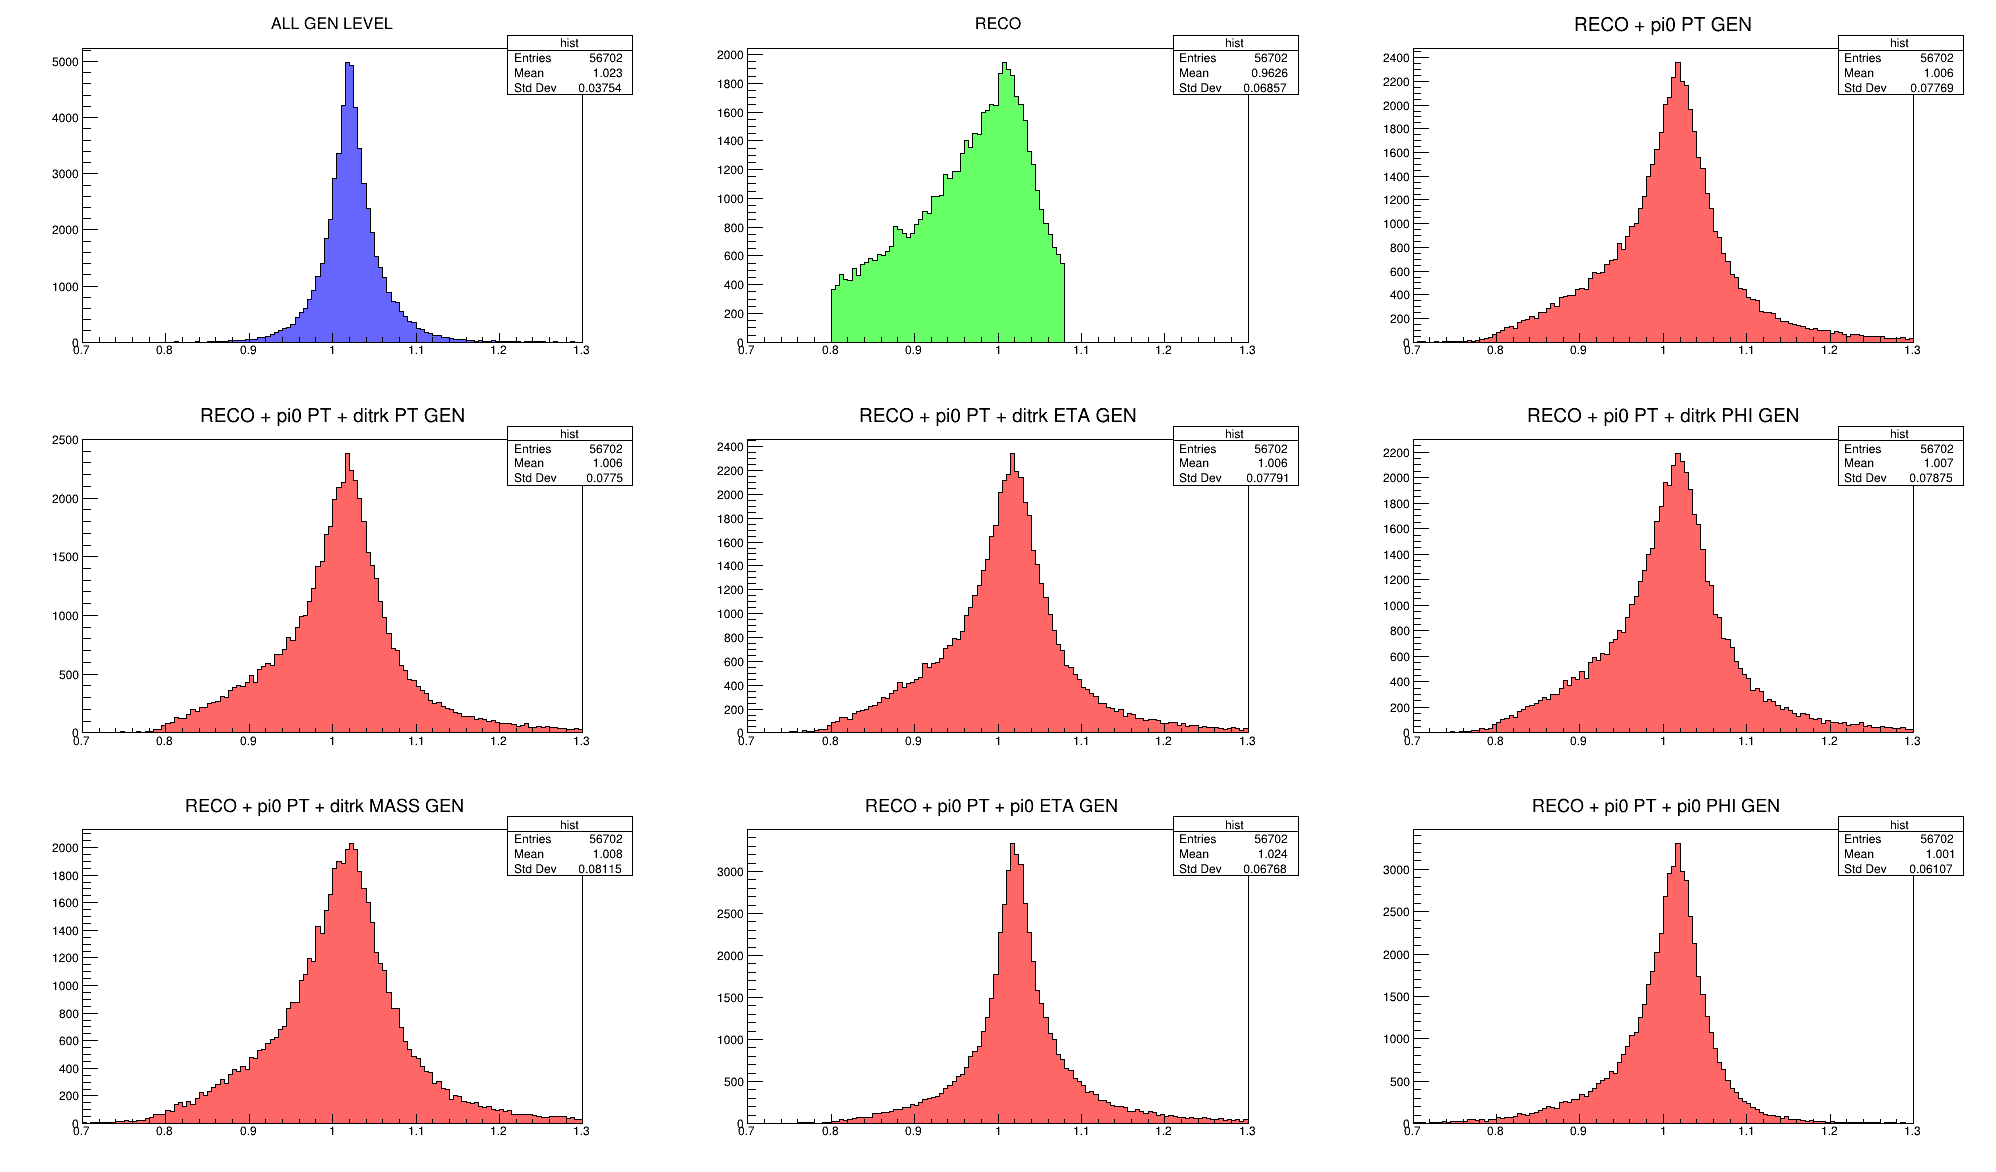

In [35]:
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 1200)
canvas.Divide(3, 3)

nbins, xlow, xhigh = 120, 0.7, 1.3

h1 = df.Histo1D(("hist", "ALL GEN LEVEL", nbins, xlow, xhigh), "mesonMass_GEN")
h2 = df.Histo1D(("hist", "RECO", nbins, xlow, xhigh), "goodMeson_mass")
h3 = df.Histo1D(("hist", "RECO + pi0 PT GEN", nbins, xlow, xhigh), "mesonMass_pi0_pt_GEN")
h4 = df.Histo1D(("hist", "RECO + pi0 PT + ditrk PT GEN", nbins, xlow, xhigh), "mesonMass_pi0_pt_ditrk_pt_GEN")
h5 = df.Histo1D(("hist", "RECO + pi0 PT + ditrk ETA GEN", nbins, xlow, xhigh), "mesonMass_pi0_pt_ditrk_eta_GEN")
h6 = df.Histo1D(("hist", "RECO + pi0 PT + ditrk PHI GEN", nbins, xlow, xhigh), "mesonMass_pi0_pt_ditrk_phi_GEN")
h7 = df.Histo1D(("hist", "RECO + pi0 PT + ditrk MASS GEN", nbins, xlow, xhigh), "mesonMass_pi0_pt_ditrk_mass_GEN")
h8 = df.Histo1D(("hist", "RECO + pi0 PT + pi0 ETA GEN", nbins, xlow, xhigh), "mesonMass_pi0_pt_pi0_eta_GEN")
h9 = df.Histo1D(("hist", "RECO + pi0 PT + pi0 PHI GEN", nbins, xlow, xhigh), "mesonMass_pi0_pt_pi0_phi_GEN")

h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kGreen-7)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kRed-7)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kRed-7)
h4.SetLineColor(ROOT.kBlack)
h5.SetFillColor(ROOT.kRed-7)
h5.SetLineColor(ROOT.kBlack)
h6.SetFillColor(ROOT.kRed-7)
h6.SetLineColor(ROOT.kBlack)
h7.SetFillColor(ROOT.kRed-7)
h7.SetLineColor(ROOT.kBlack)
h8.SetFillColor(ROOT.kRed-7)
h8.SetLineColor(ROOT.kBlack)
h9.SetFillColor(ROOT.kRed-7)
h9.SetLineColor(ROOT.kBlack)

p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
h4.Draw("hist")
p = canvas.cd(5)
h5.Draw("hist")
p = canvas.cd(6)
h6.Draw("hist")
p = canvas.cd(7)
h7.Draw("hist")
p = canvas.cd(8)
h8.Draw("hist")
p = canvas.cd(9)
h9.Draw("hist")

canvas.Draw()

print("REPLACING ONE VARIABLE WITH THE GEN LEVEL EQUIVALENT")
print("MOST IMPORTANT TO PREDICT TO IMPROVE: GOODMESON PT!")